<b>(2) 선형회귀(Linear Regression) </b>  
그럼 가장 간단한 Linear Regression 을 Tensorflow 로 한번 구현해 보자. 단순 선형회귀를 가정하면 우리가 구하고자 하는 모델은 아마도 y = wx+b 형태가 될 것이고, 우리가 찾고자 하는 값은 주어진 데이터를 가장 잘 설명하는 w와 b 값을 찾는 것이 될 것이다. 그 말은 즉 주어진 데이터와 모델이 차이(Error)를 Minimize 하는 방향으로 w,b 값을 Train 해가면 되는 것이다. Tensorflow 는 기본적으로 이러한 이론을 그대로 코딩하는 형태로 동작한다. 이해를 돕기위하여 아래의 코드를 설명하도록 하겠다. 

아래의 코드를 보면 Weight 값과 Biase 값을 정의하고 있다. 위에서 설명한 것과 같이 초기 값을 갖으며, 변경이 가능한 변수로 정의하기 때문에 tf.Variable 객체를 사용하고 있다. Weight 값을 [784, 200] 사이즈를 갖는 Matirx 로 정의하고

[전체 코드] 

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Epoch: 0050 cost= 0.168433964 W= 0.418702 b= -0.415084
Epoch: 0100 cost= 0.157866150 W= 0.408644 b= -0.34273
Epoch: 0150 cost= 0.148518920 W= 0.399184 b= -0.274679
Epoch: 0200 cost= 0.140251175 W= 0.390288 b= -0.210676
Epoch: 0250 cost= 0.132938400 W= 0.38192 b= -0.150479
Epoch: 0300 cost= 0.126470312 W= 0.37405 b= -0.0938622
Epoch: 0350 cost= 0.120749377 W= 0.366648 b= -0.0406128
Epoch: 0400 cost= 0.115689337 W= 0.359686 b= 0.00946964
Epoch: 0450 cost= 0.111213848 W= 0.353138 b= 0.0565735
Epoch: 0500 cost= 0.107255459 W= 0.34698 b= 0.100876
Epoch: 0550 cost= 0.103754379 W= 0.341188 b= 0.142543
Epoch: 0600 cost= 0.100657895 W= 0.33574 b= 0.181733
Epoch: 0650 cost= 0.097919226 W= 0.330617 b= 0.218591
Epoch: 0700 cost= 0.095497049 W= 0.325798 b= 0.253258
Epoch: 0750 cost= 0.093354829 W= 0.321266 b= 0.285863
Epoch: 0800 cost= 0.091460198 W= 0.317003 b= 0.316528
Epoch: 0850 cost= 0.089784674 W= 0.312994 b= 0.345369
Epoch: 0900 cost= 0.088302791 W= 0.309223 b= 0.372496
Epoch: 0950 cost= 0.0

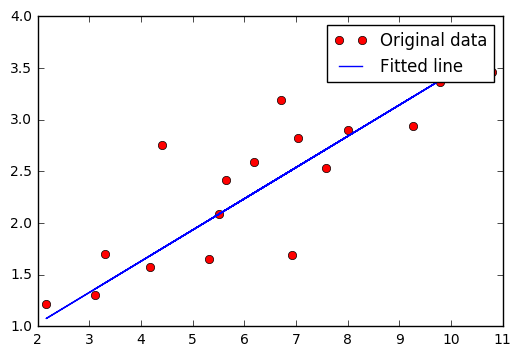

Testing... (Mean square loss Comparison)
Testing cost= 0.0784944
Absolute mean square loss difference: 0.00733889


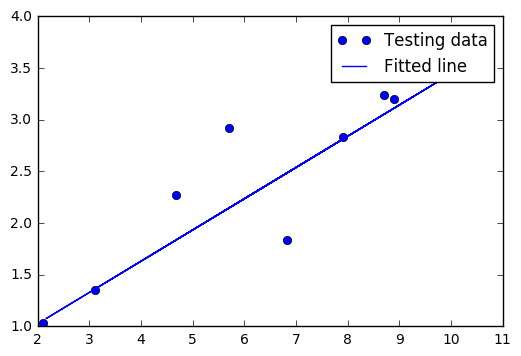

In [1]:

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()